<br>Dataset: https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps</br>
<br>Target audience: Executive or Biz partner which wants to develop and launch a new app</br>

#### Questions:
#### 1. What are top trending apps in iOS app store?
#### 2. How does the App details contribute the user ratings?
#### 3. Try to compare app statistics for different groups?
#### 4. What should our strategy be to get more people to download our app? How can we make sure they can easily find our app?

In [244]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and check the basic information
data = pd.read_csv("20.3.2_AppleStore.csv")
data.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [245]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7197 non-null   int64  
 1   id                7197 non-null   int64  
 2   track_name        7197 non-null   object 
 3   size_bytes        7197 non-null   int64  
 4   currency          7197 non-null   object 
 5   price             7197 non-null   float64
 6   rating_count_tot  7197 non-null   int64  
 7   rating_count_ver  7197 non-null   int64  
 8   user_rating       7197 non-null   float64
 9   user_rating_ver   7197 non-null   float64
 10  ver               7197 non-null   object 
 11  cont_rating       7197 non-null   object 
 12  prime_genre       7197 non-null   object 
 13  sup_devices.num   7197 non-null   int64  
 14  ipadSc_urls.num   7197 non-null   int64  
 15  lang.num          7197 non-null   int64  
 16  vpp_lic           7197 non-null   int64  


In [246]:
data.describe()

,Unnamed: 0,id,size_bytes,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,460.373906,3.526956,3.253578,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,1.000000,3.500000,2.500000,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,23.000000,4.000000,4.000000,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,140.000000,4.500000,4.500000,38.000000,5.000000,8.000000,1.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,177050.000000,5.000000,5.000000,47.000000,5.000000,75.000000,1.000000


In [247]:
# Check if there is any null
data.isnull().all()

Unnamed: 0          False
id                  False
track_name          False
size_bytes          False
currency            False
price               False
rating_count_tot    False
rating_count_ver    False
user_rating         False
user_rating_ver     False
ver                 False
cont_rating         False
prime_genre         False
sup_devices.num     False
ipadSc_urls.num     False
lang.num            False
vpp_lic             False
dtype: bool

In [248]:
# Deal with column Unnamed


In [249]:
data['track_name'].nunique()

7195

We can see 2 rows have duplicated apps, let's find them.

In [250]:
data.loc[data['track_name'].duplicated()]

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
5603,7579,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1
7128,10885,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


In [251]:
data.loc[data['track_name'] == 'VR Roller Coaster']

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
3319,4000,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,2.0.0,4+,Games,37,5,1,1
5603,7579,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,0.81,4+,Games,38,0,1,1


In [252]:
data.loc[data['track_name'] == 'Mannequin Challenge']

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
7092,10751,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,1.4,9+,Games,37,4,1,1
7128,10885,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,1.0.1,4+,Games,38,5,1,1


#### Question: What should I do with these duplicated data having the same app name?

# Visualization

#### Which currency is being used for app purchases?

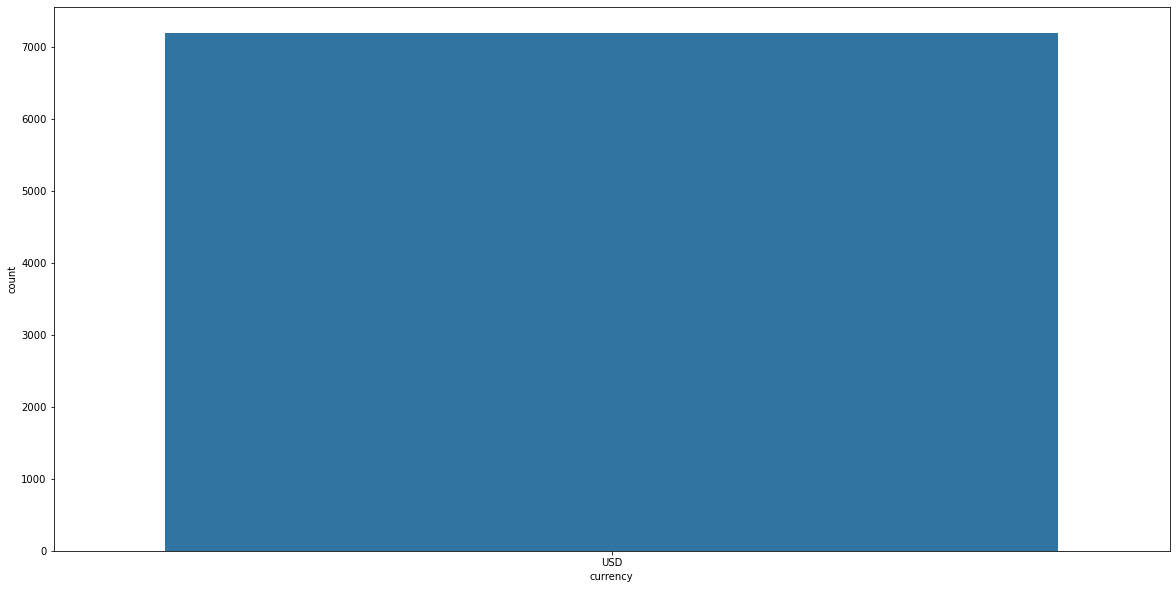

In [253]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='currency')

#### What kinds of apps are popular now?

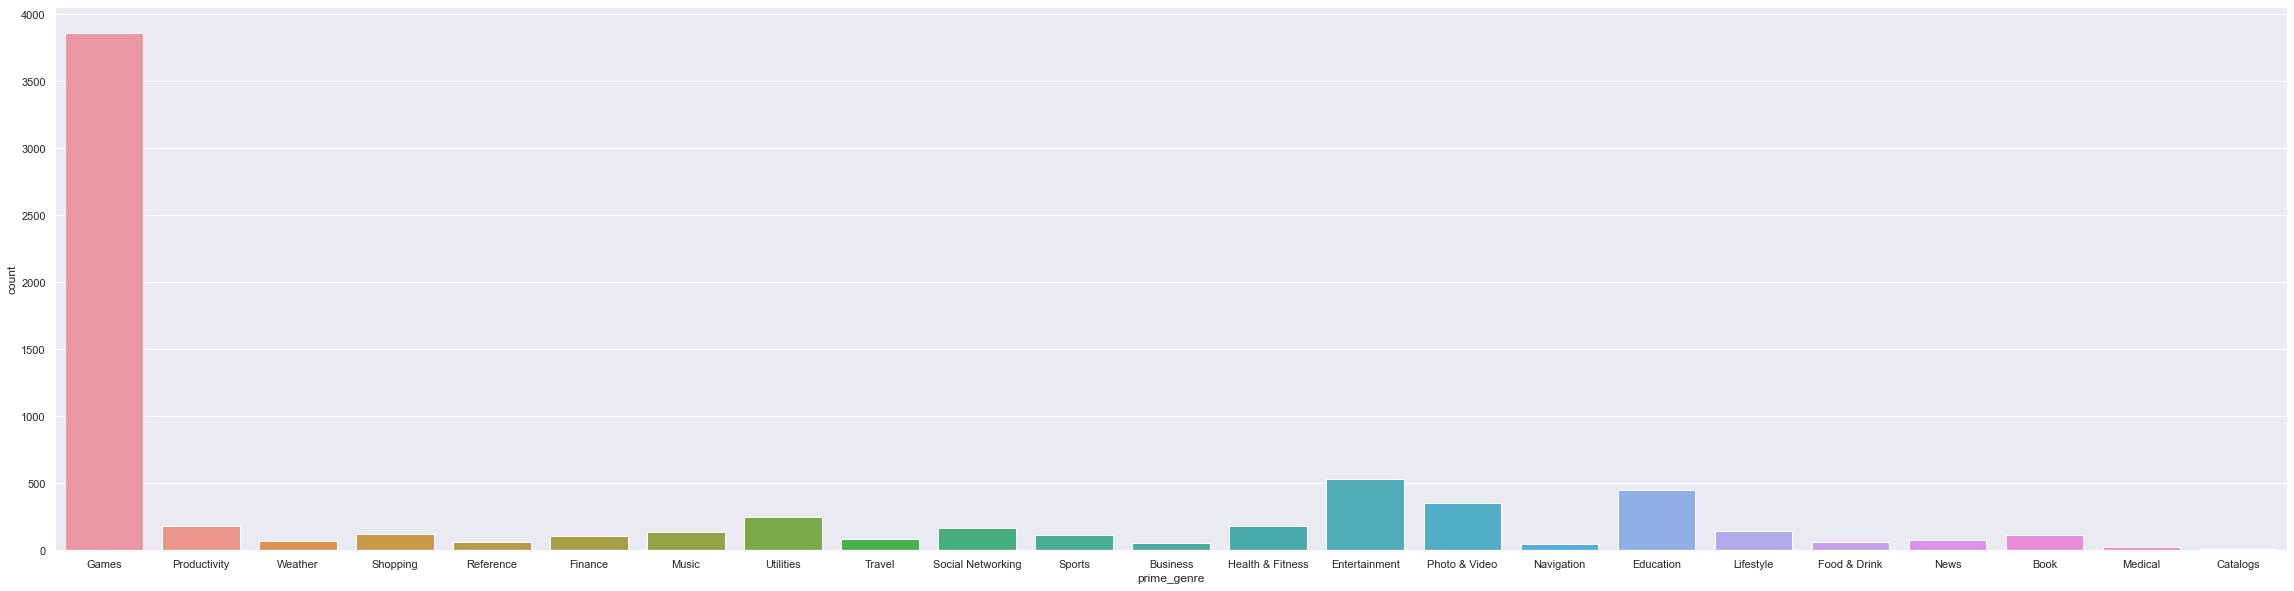

In [317]:
plt.figure(figsize=(40,10))
sns.countplot(data=data, x='prime_genre')

We can see that game is the most trending genre in the iOS app store.

#### What is the price range per genre?

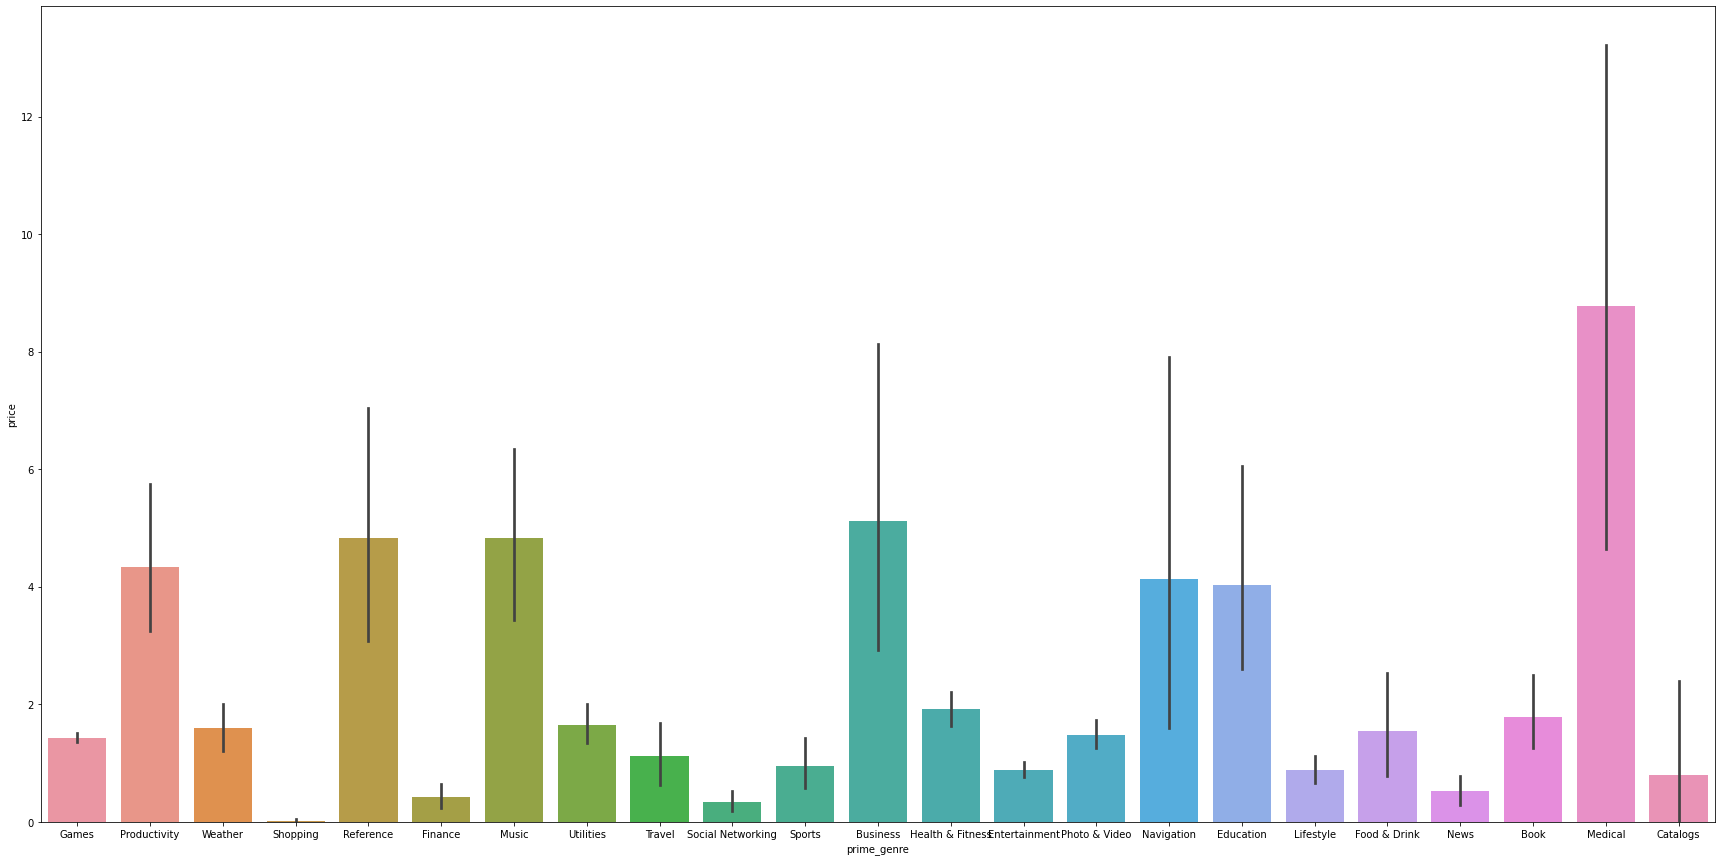

In [255]:
plt.figure(figsize=(30,15))
sns.barplot(data=data, x='prime_genre', y='price')

<br>While game apps are the most trending, the price was kind of low.</br>
<br>Medical apps are the most expensive, which is over `$8`, and the second expensive group consists of 'Business', 'Reference', 'Music', 'Productivity', 'Navigation', and 'Education', which are in range of `$4-5`, while the rest of genres are less than `$2`.</br>

#### What is the price range of popular apps?

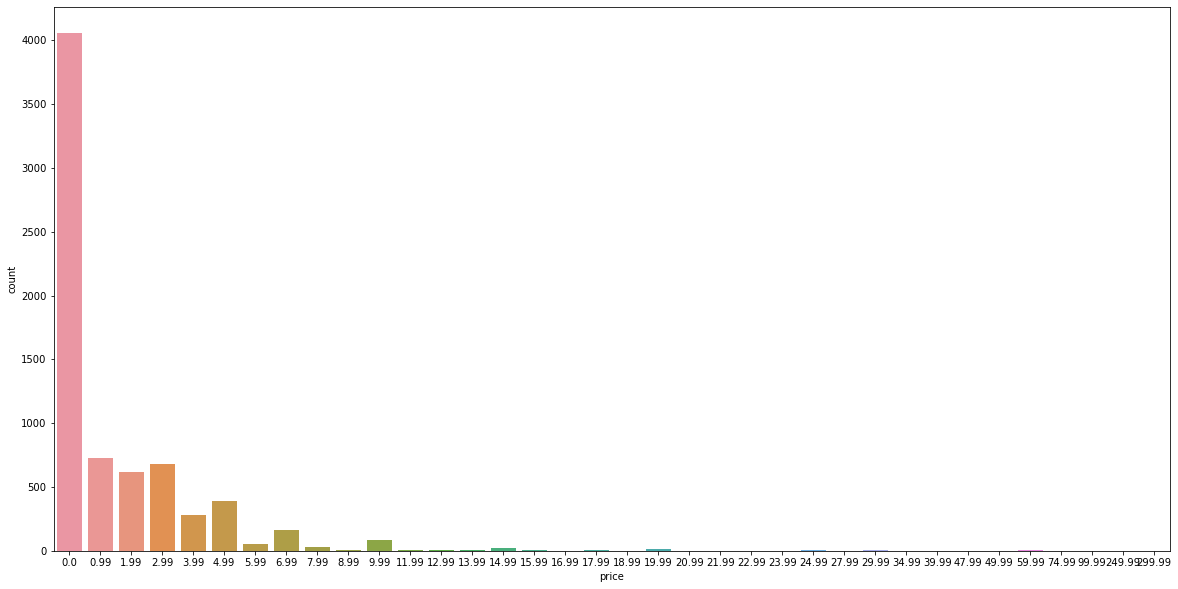

In [256]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='price')

<br>We can see that the free apps have the overwhelming number of download.</br>
<br>Among the paid apps, the download numbers significantly decreased if it is more than `$3`.

#### If the app is expensive, does it get higher user rating?

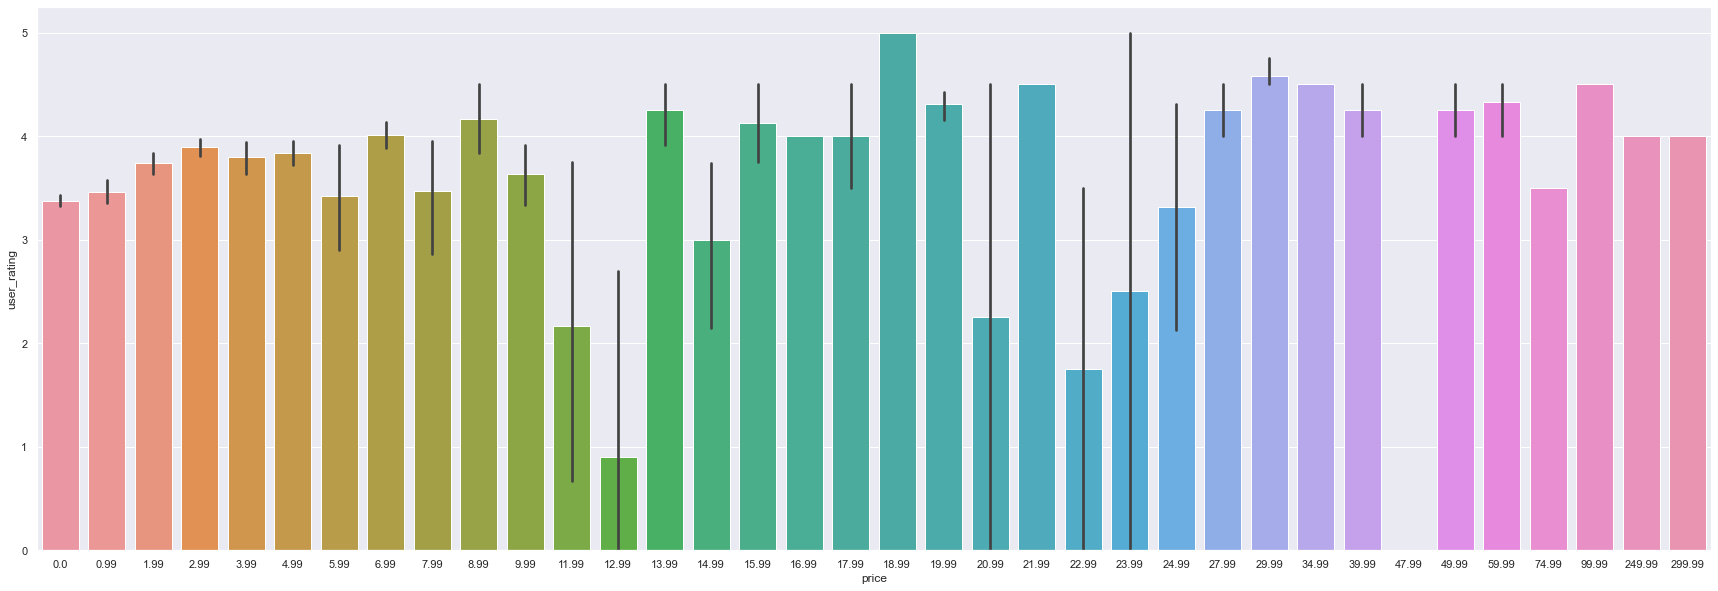

In [307]:
plt.figure(figsize=(30,10))
sns.barplot(data=data, x='price', y='user_rating')

It looks the price and user rating are not correlated.

#### How the user rating affects the app download?

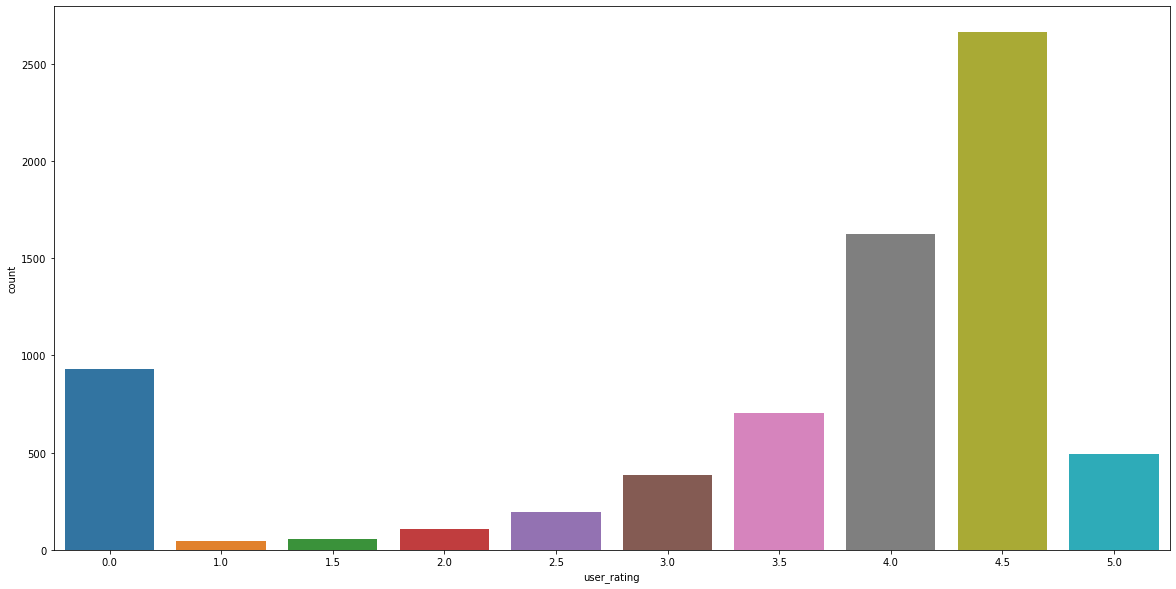

In [257]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='user_rating')

<br>Higher user rating, higher number of downloading.</br>
<br>We need to check if rating 0 means that just no one rated the app yet or that app is really bad.</br>
<br>In case of rating 5, I guess that not many apps got 5 star.</br>

#### Does highly rated apps have more rating counts?

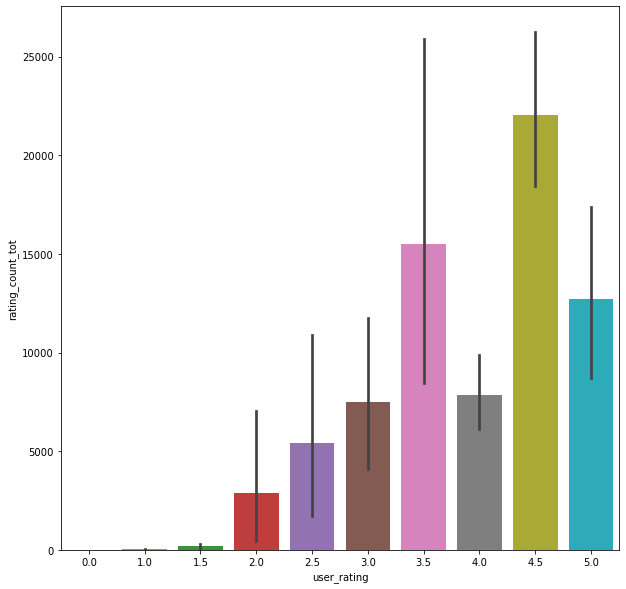

In [258]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='user_rating', y='rating_count_tot')

#### How is the average of user ratings per genre?

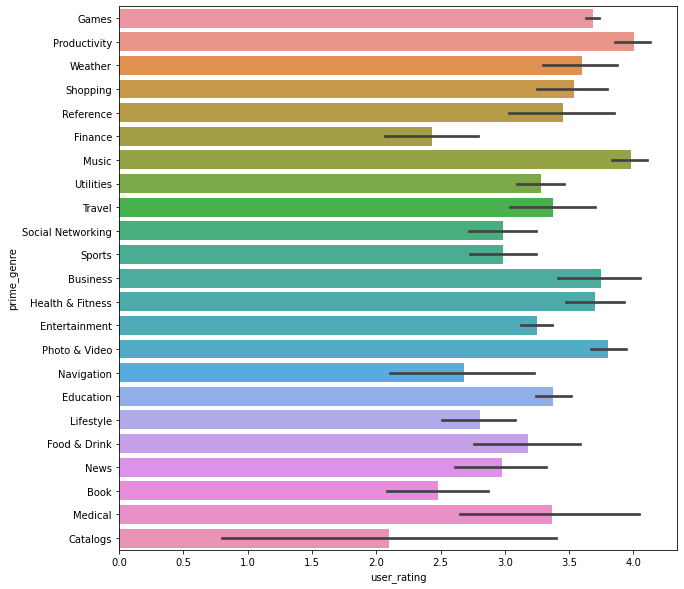

In [259]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='user_rating', y='prime_genre')

'Productivity' and 'Music' apps have over 4.0 rating, while 'Finance', 'Book', 'Catalog' apps have below 2.5 rating.

#### How many users rated per genre?

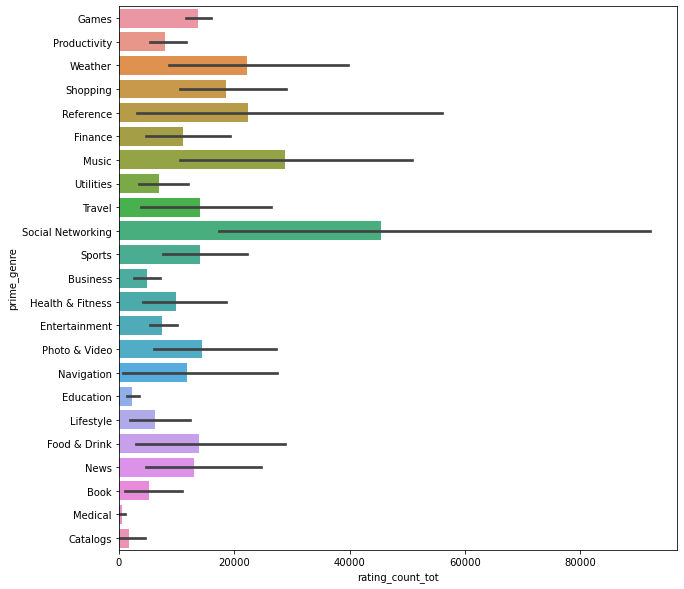

In [260]:
plt.figure(figsize=(10,10))
sns.barplot(data=data, x='rating_count_tot', y='prime_genre')

'Social Networking' apps have the highest rating counts, and 'Music', 'Reference', and 'Weather' apps marked as the second, third, and fourth highest rating counts in the order.

#### What ages are available to use the apps?

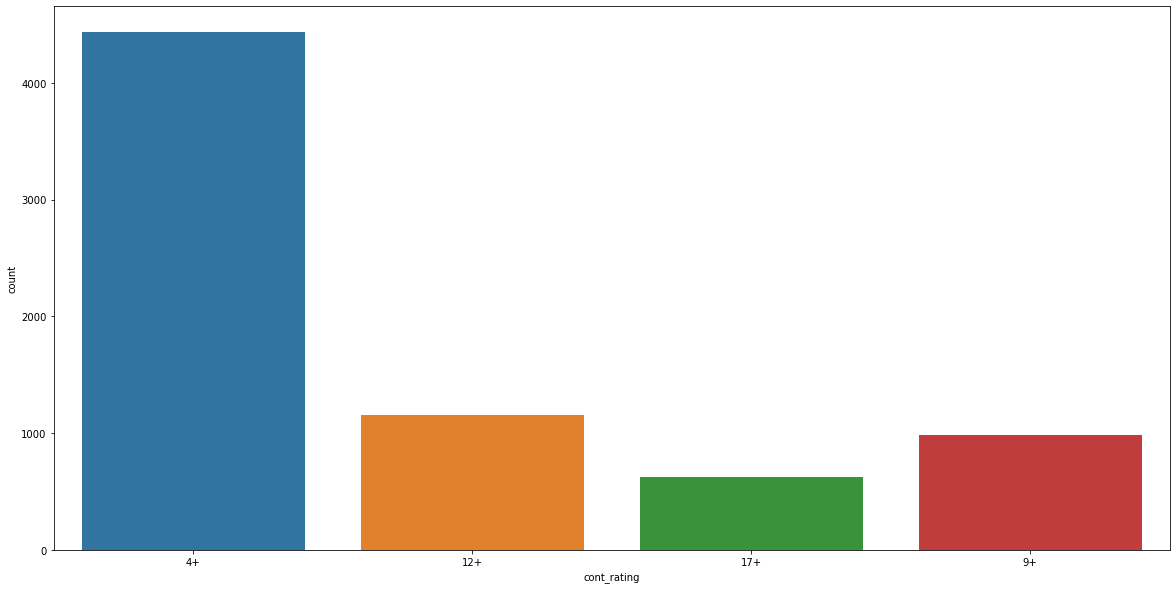

In [220]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='cont_rating')

The majority of apps are availble for 4 years or older.

#### How many devices can be supported to use the apps?

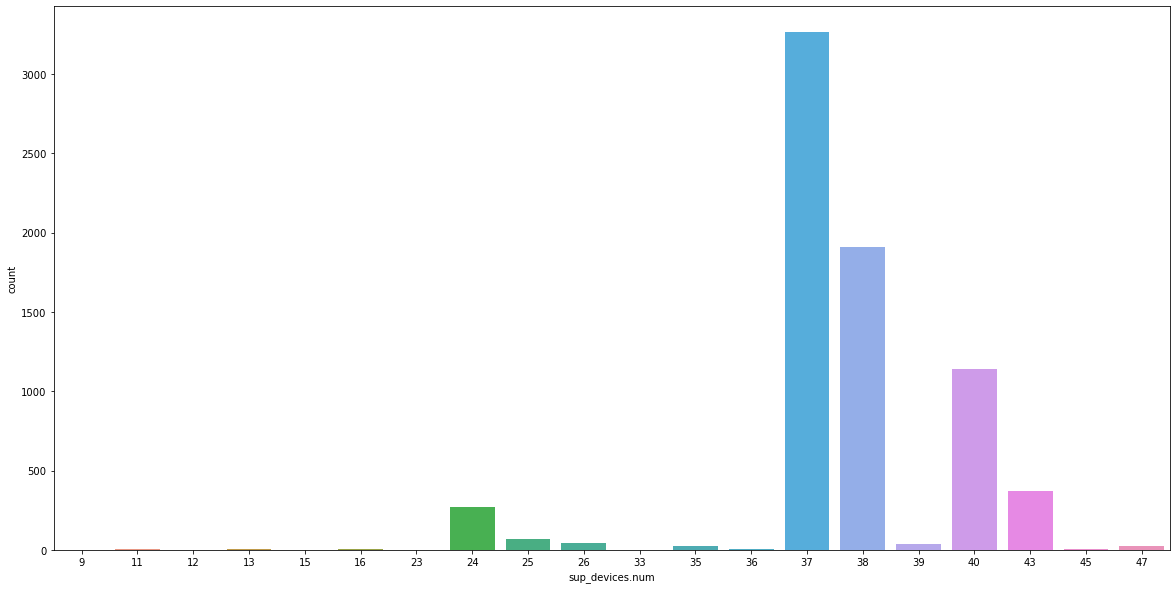

In [221]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='sup_devices.num')

The most apps can support 37-43 kinds of devices

#### How many screenshots are showed for display?

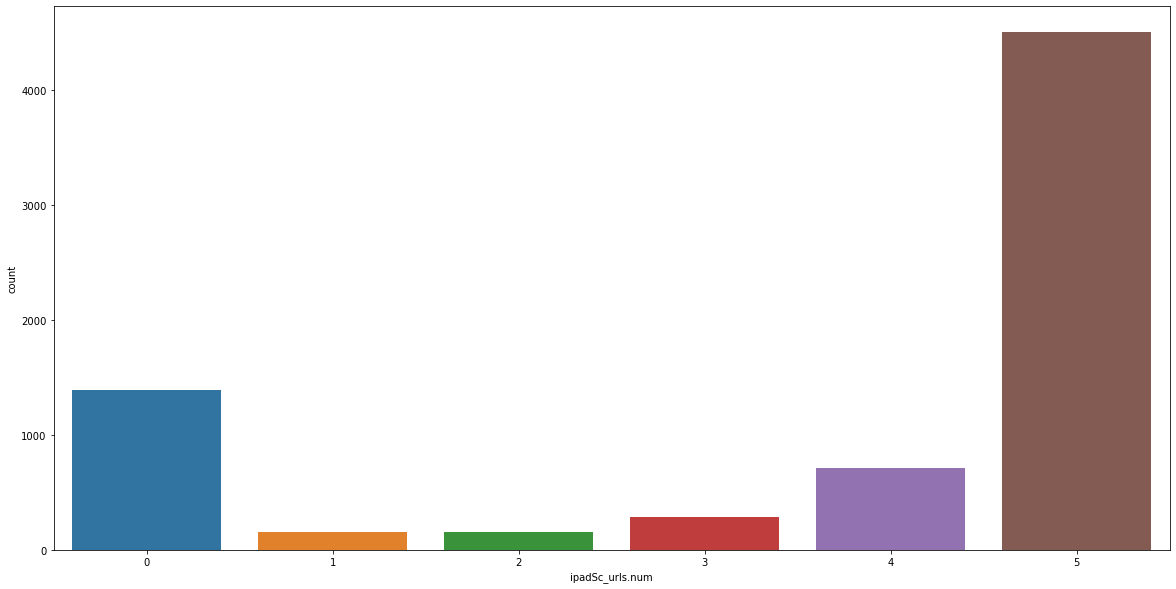

In [222]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='ipadSc_urls.num')

The most of apps provides 5 screenshots for display.

#### How many languages are supported?

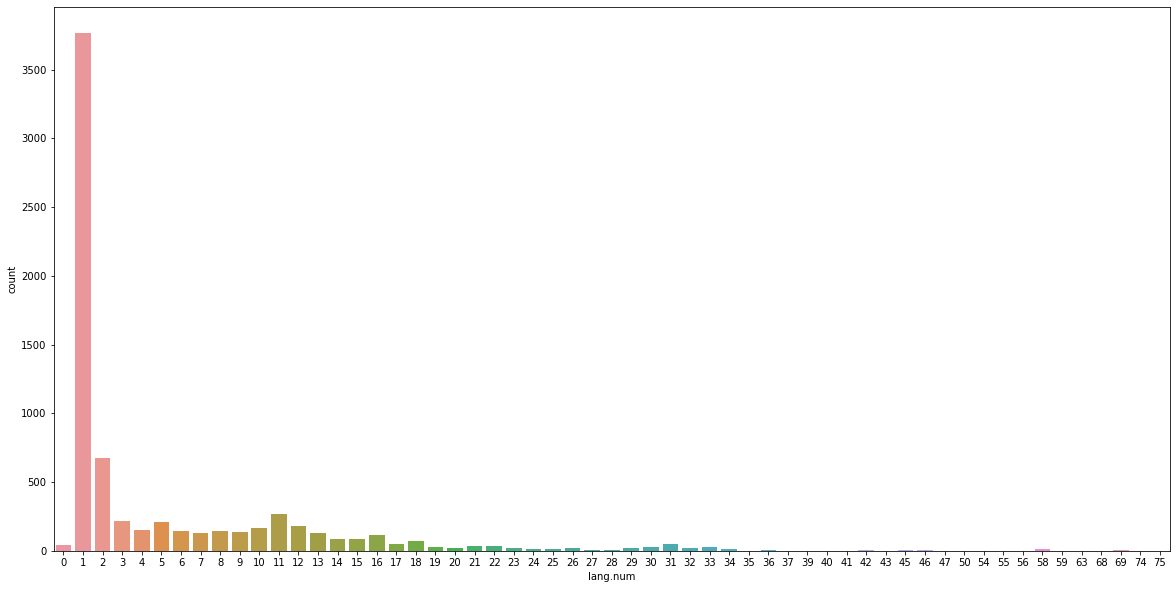

In [223]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='lang.num')

The most apps support only 1 language, while some apps support more than 2 languages.

#### Does app support VPP (Volume Purchase Program)?
##### The Volume Purchase Program (VPP) makes it easy for businesses to purchase, distribute, and manage their apps and books in bulk. Whether your workforce uses iPhone, iPad, or Mac, you can provide great content that’s ready for work with flexible and secure distribution options.
https://images.apple.com/business-docs/VPP_Business_Guide.pdf

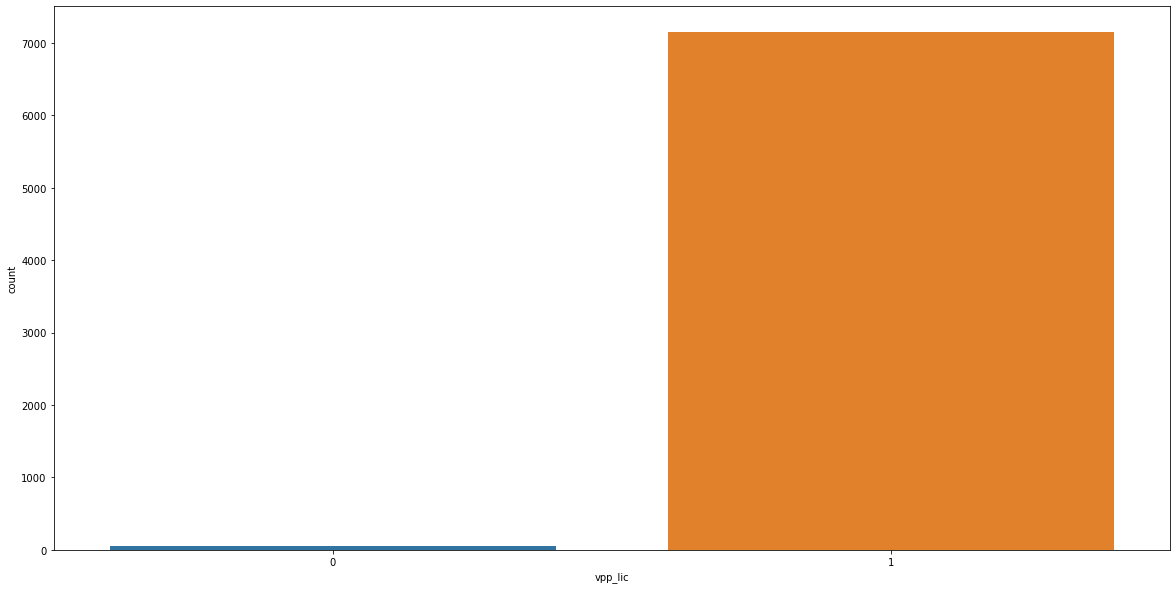

In [224]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='vpp_lic')

1 means 'Yes' here, so it means that the most apps support VPP for bulk purchase by organization, like biz or educational organizations.

# Analysis

<br>Through these visualizations, we could see what the trend is in iOS app store as following.</br>

<br>We could see that people download tremendous apps for fun and enjoying, such as game, entertainment, photo/video related genre, etc., while they are mostly able to download at very low prices or free.</br>
<br>In contrast with this, people is willing to pay much more on productive apps in Buisness and Academic things.</br>
<br>Especially, educational apps are generally quite pricey but also has high number of download at the same time.</br>

<br></br>When downloading apps, people seems caring about the user rating a lot as the majority of downloaded apps have more than 4 out of 5 rating score.
<br></br>However, we could see that the expensive apps doesn't guarantee the higher user satisfaction - rating.

<br></br>Many of trending apps are available from 4 year-old, should support, at least, 37 kinds of devices, and support VPP for bulk purchase.
<br></br>For displaying the app, majority of apps uses 5 screenshots to provide more information how the app works, etc.

# Conclusion

<br>Gaming or entertaining apps are now red ocean so it would be really tough to compete and survive without high user rating.</br>
<br>If planning to develop some productive app, we should be focusing on the quality of the app to get a higher user rating as a few well-made and highly rated apps could become dominant apps in those categories.</br>
<br>It means that, for example, users just can find other games among millions of games if a game app is not enjoyable. However, the productive app, for example, Evernote became a dominant memo app and many people People took for granted to install the app for personal, business or academic note. As well, once the app became a dominant, people are willing to pay some money to get a premium benefit on using the app.</br>
<br>In addition, the new app should be available from 4 year-old, and support around 37-40 types of devices and VPP for bulk purchase, especially it can be utilized in Business or Academic organizaitons.</br>